# Name: Yucheng Jin 
# ID: 3170112253
# NetID: yucheng9

**Quick Note**
* For Part I, Part II, the code is in Lab1.ipynb.
* For Part III, the code is in Part III folder.
* Part IV, Part V: https://colab.research.google.com/drive/1MCXCnRyy2TOcZwABKQ83Vm_tzYVHrpIi

# PART I: Raspberry Pi Setup and Basics

**Part I - 6 pts**
* (1 pt) Show outputs from cat /proc/cpuinfo (0.5 pt) and ifconfig (0.5 pt) of the computer on which you have been working on this lab.
* (5 pts) Include screen snapshots to show that your news display code is working correctly on your system:
   * Send POST request (1 pt)
   * Get respond from server (1 pt)
   * Retrieve string from server response (2 pts)

**Raspberry Pi Setup**

I connected to the host in ZJU Internation Campus, and here is the result (there are 32 processors):

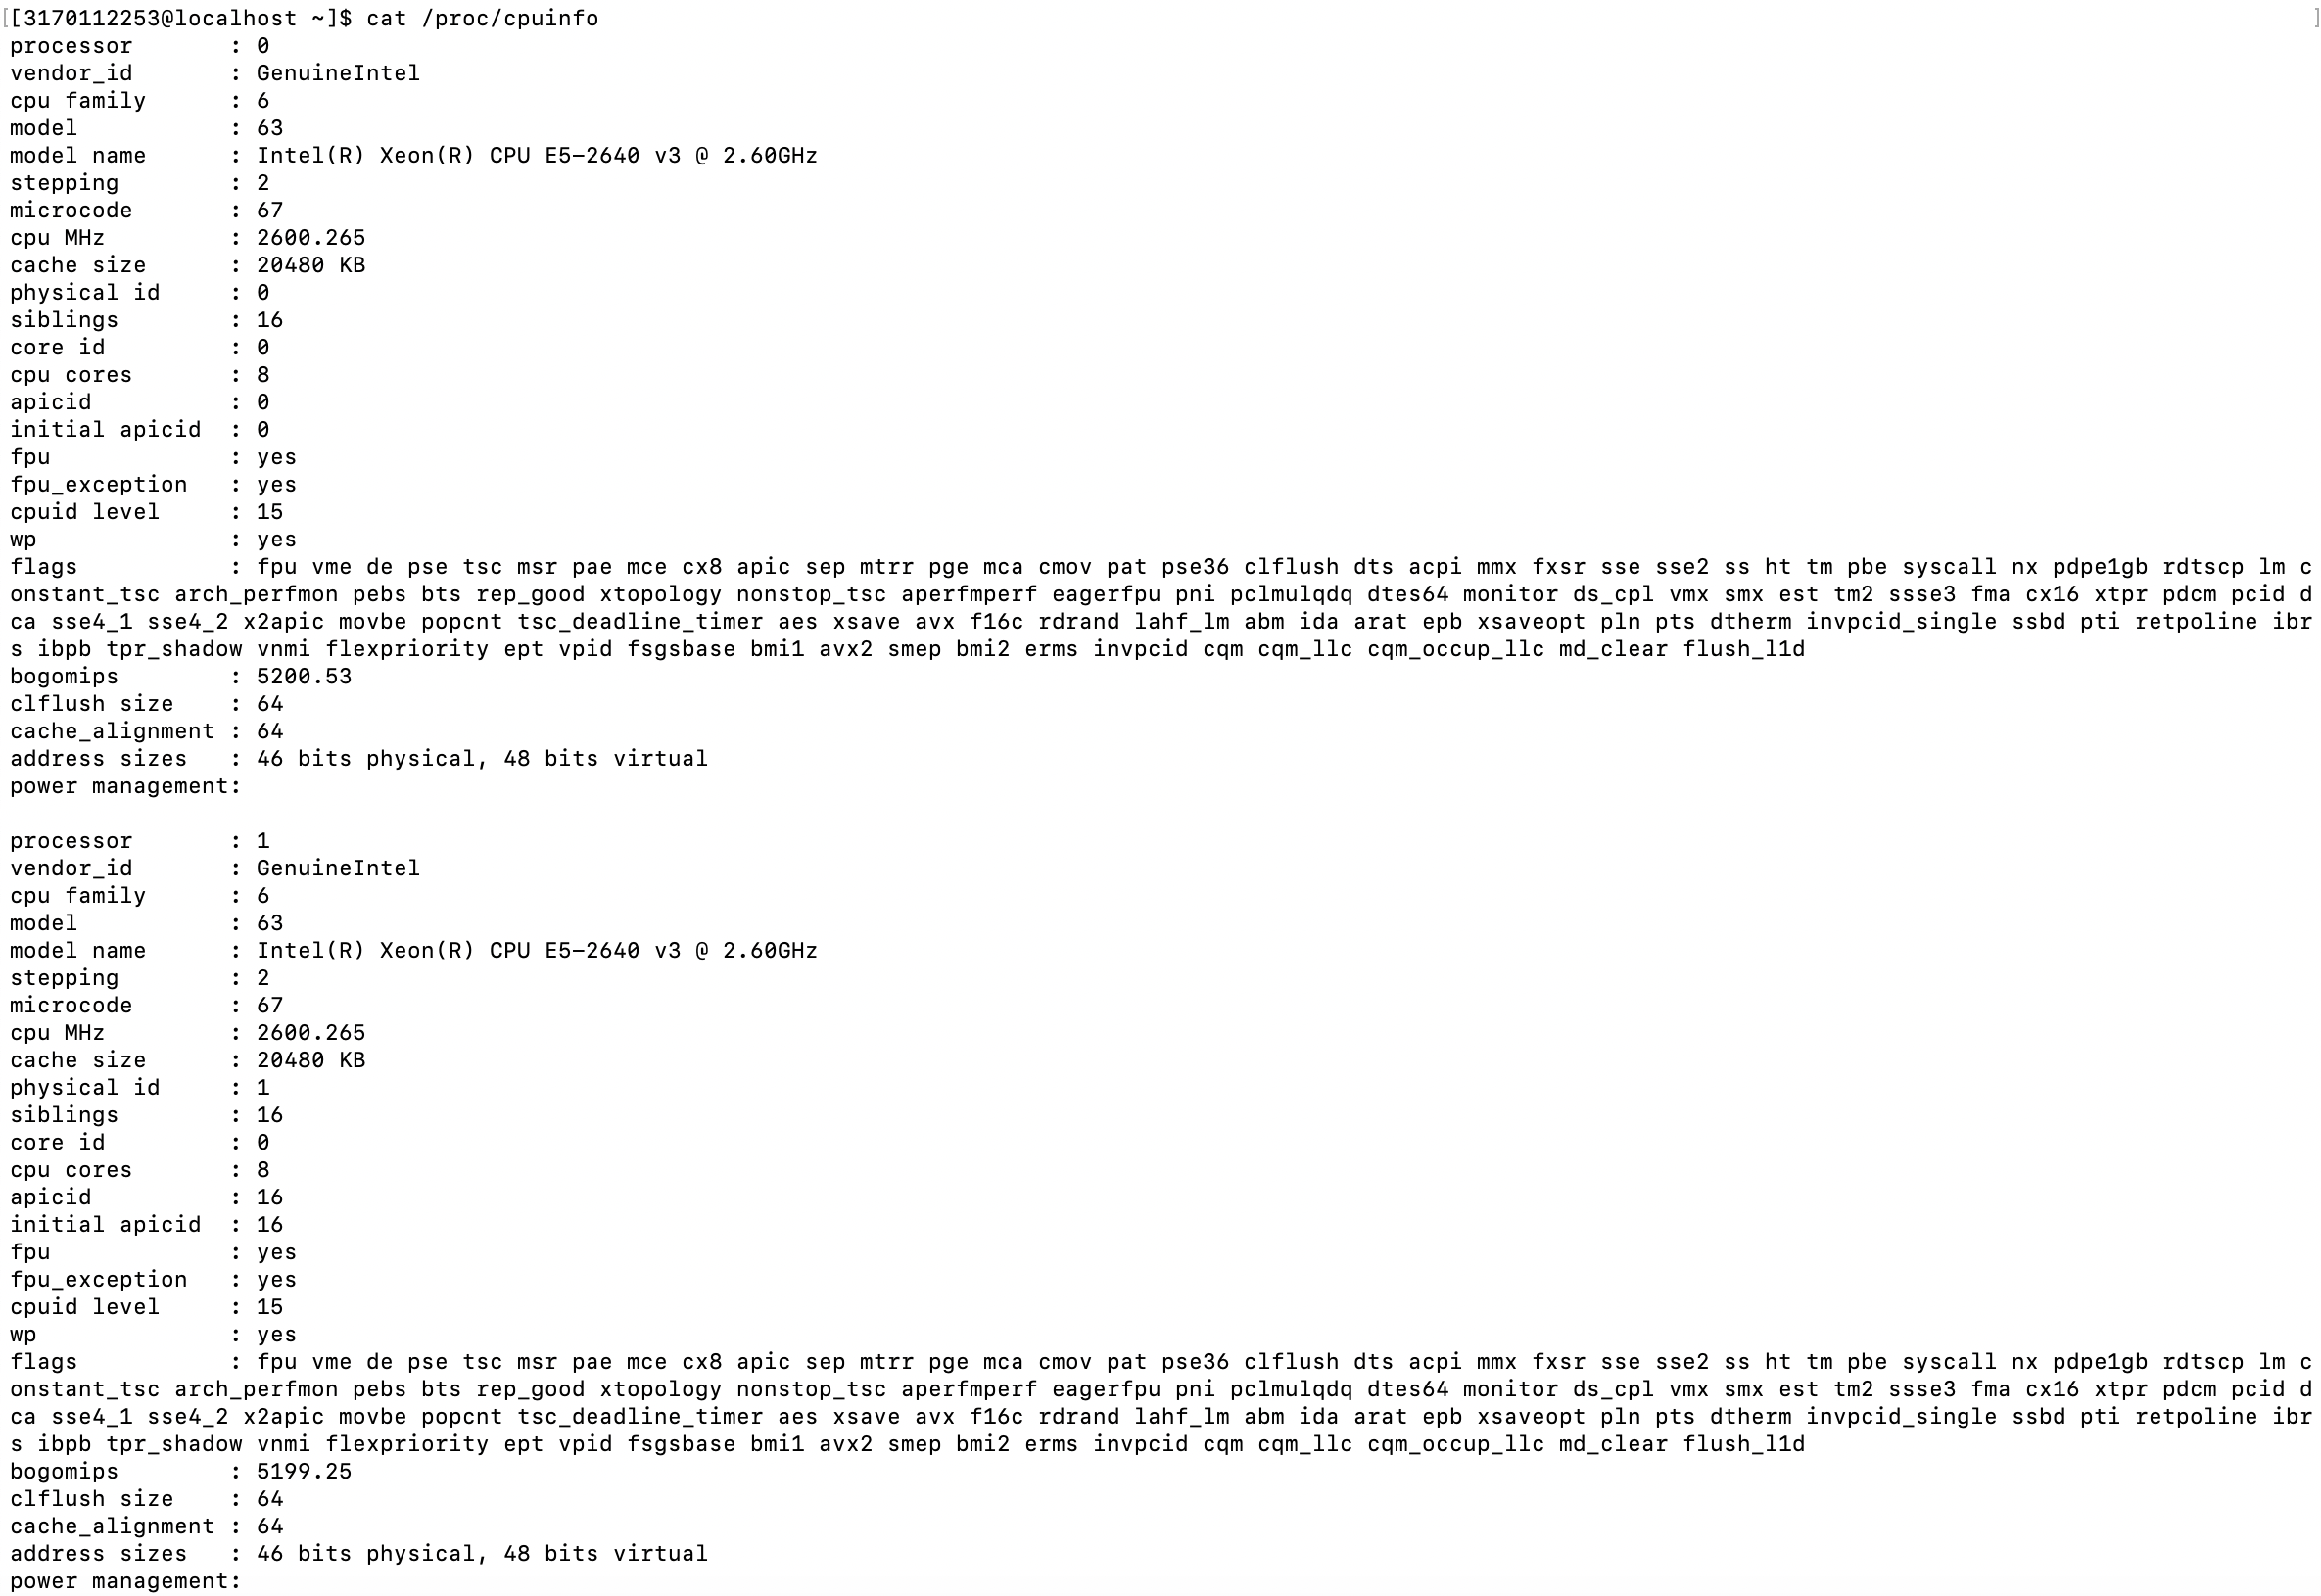

In [1]:
from IPython.display import Image
Image(filename = "Images/processor1.png")

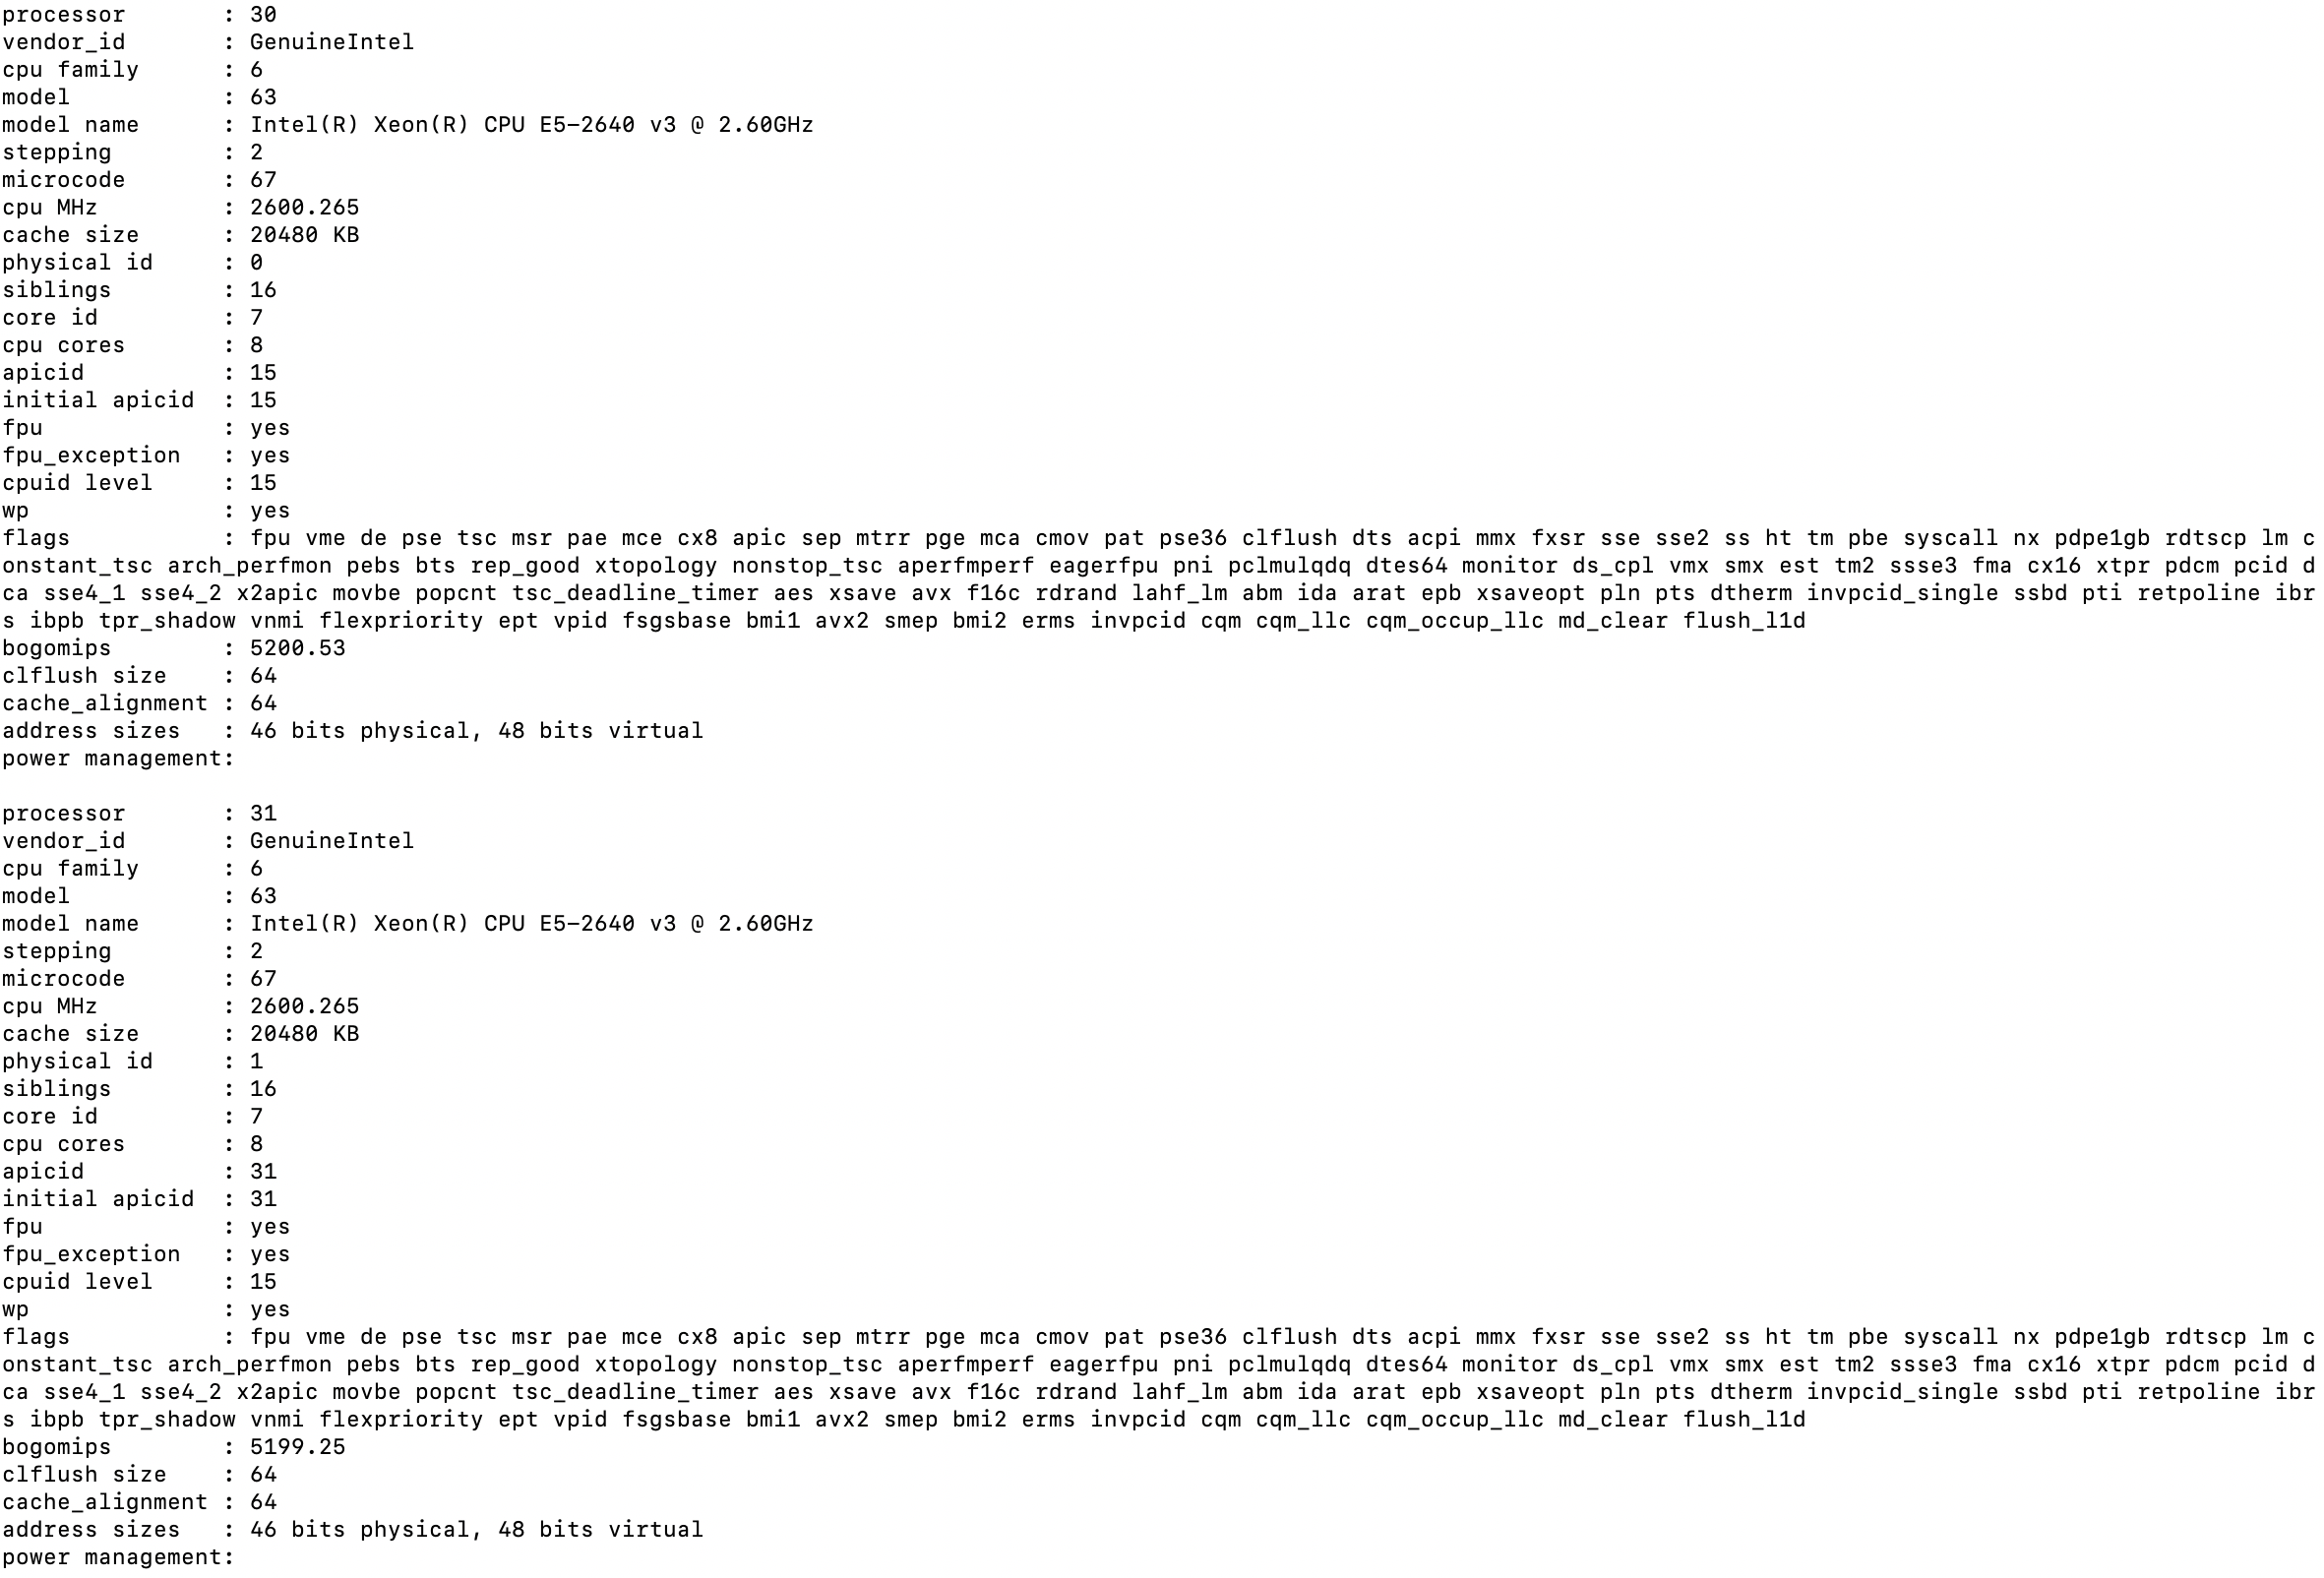

In [2]:
Image(filename = "Images/processor2.png")

This is the result from my Dell laptop:

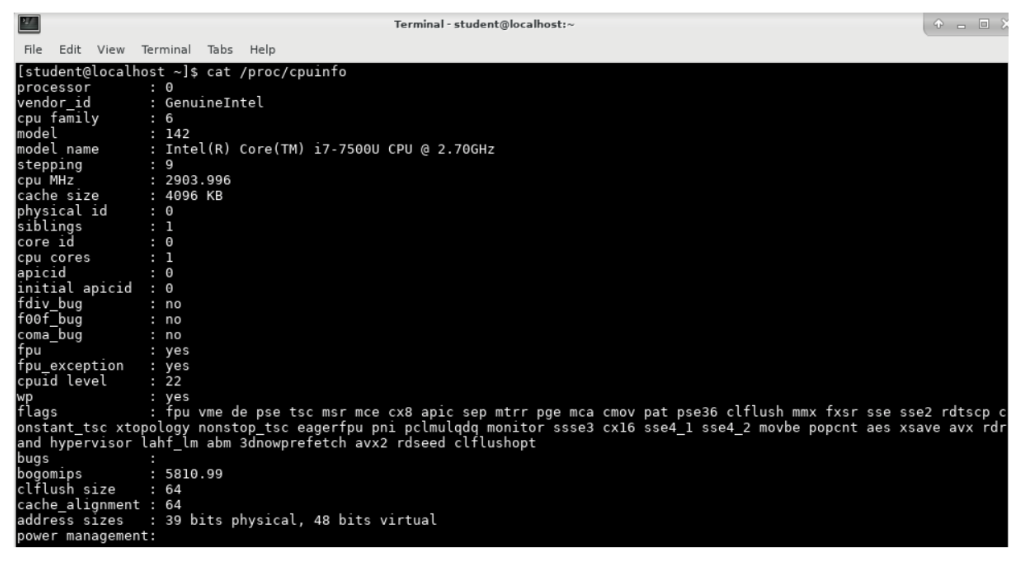

In [3]:
Image(filename = "Images/processor3.png")

This is the result of my network interface configuration:

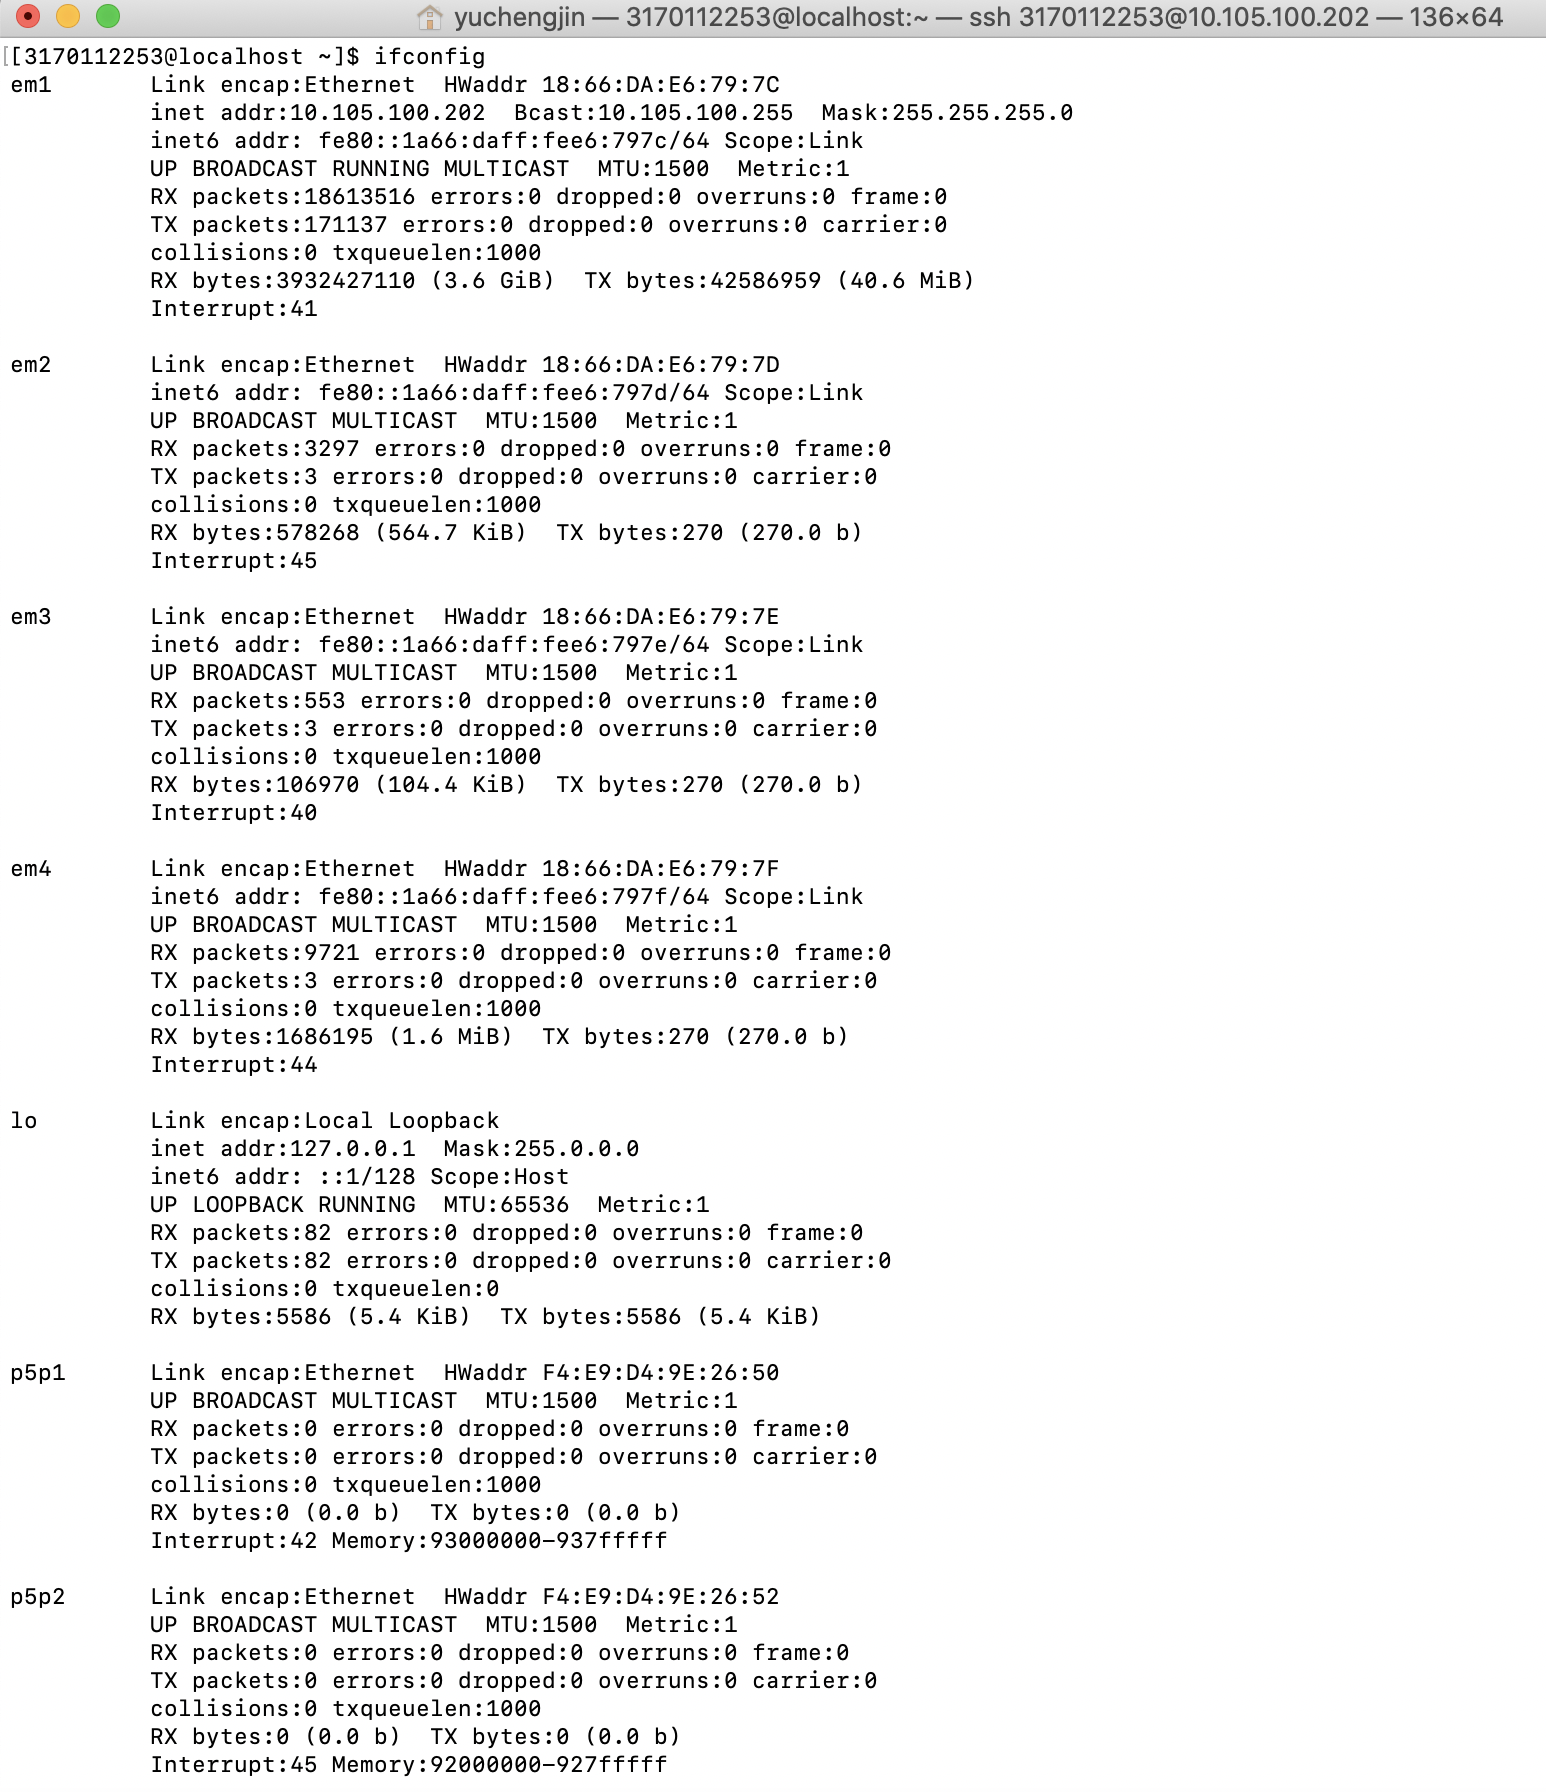

In [4]:
Image(filename = "Images/ifconfig.png")

**NumPy and TensorFlow Setup**

In [5]:
import numpy as np
np.__version__

'1.16.4'

In [6]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow.compat.v1 as tf
# make tf 2.0.0 version compatible with 1.14 grammar
tf.disable_v2_behavior()
tf.__version__

Instructions for updating:
non-resource variables are not supported in the long term


'2.0.0'

**HTTP Request in Python**

Please write a Python script for your Raspberry Pi to implement this feature:
* In your Raspberry Pi, use Python to send a POST request to this webpage: https://courses.engr.illinois.edu/ece498icc/sp2020/lab1_string.php
* Your POST request should contain two data fields netid and name. Fill your NetID and name in these two fields respectively. The server will record your NetID and your name.
* The customized news is hidden in the response from the server. The news is a string of length 400. The ith character in the string is the (i*498)th character in the server's response. The index starts from 0. Please retrieve the customized news from the server's response. You are NOT allowed to use explicit for loops, please use Python generator expressions instead.
* Report the customized news you get from the server.

In [7]:
import urllib.parse
import urllib.request

# send POST request
url = 'https://courses.engr.illinois.edu/ece498icc/sp2020/lab1_string.php'
values = {'netid':'yucheng9', 'name':'Yucheng Jin'}

data = urllib.parse.urlencode(values)
data = data.encode('ascii')

# get respond from server
req = urllib.request.Request(url, data)
with urllib.request.urlopen(req) as response:

# retrieve & decode the string
    the_page = response.read()

decoded_news = the_page.decode('ascii')
news = [decoded_news[i] for i in range(0, 400*498, 498)]

In [8]:
print("".join(news))

The police stops a computer hardware engineer: Your light isn't working. You have to get off your bike." IT guy: "I tried that but the light still isn't working.  Hello Yucheng Jin! I hope you enjoy the course.                                                                                                                                                                                              


# PART II: NumPy Basics

**Part II - 6 pts**
* (6 pts) You need to print out the array A, B, C, D, E, F, and the result in Step 8.
    * Correct A, E, and result from Step 8 (1 pt x 3)
    * Correct B, C, D, F. (0.5 pt x 4)
    * Attach the screen shots for each step and write down the approaches you used.

Include your source code. Without this source code you will not receive any points for Part II!

**NumPy array generation**

Step 1: Generate a 2-dim all-zero array A, with the size of 9 x 6 (row x column).

In [9]:
# use np.zeros((9,6)) to generate a 2d array of size 9 * 6
A = np.zeros((9,6))
A

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

Step 2: Create a block-I shape by replacing certain elements from 0 to 1 in array A.

In [10]:
# use slicing to create the I-shape block
A[0,1:5] = 1
A[1,1:5] = 1
A[2,2:4] = 1
A[3,2:4] = 1
A[4,2:4] = 1
A[5,2:4] = 1
A[6,2:4] = 1
A[7,1:5] = 1
A[8,1:5] = 1
A

array([[0., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 0.]])

Step 3: Generate a 2-dim array B by filling zero-vector at the top and bottom of the array A.

In [11]:
# X is a vector of six 0s 
X = np.zeros((1,6))
# B is a copy of A
B = A.copy()
# concatenate X to the top & bottom of B
B = np.concatenate((X,B), axis=0)
B = np.concatenate((B,X), axis=0)
B

array([[0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0.]])

**Numerical computation**

Step 4: Generate a 2-dim array C, with numbers 1, 2, 3, ..., 65, 66 filled in row by row, starting from the top-left corner of the array. The size of C is 11 x 6 (row x column, the same size as array B).

In [12]:
# use np.arange(1,67) to generate a 1d array with 1, 2, 3, ..., 66
C = np.arange(1,67)
# use reshape((11,6)) to convert C into a 2d array of size 11 * 6
C = C.reshape((11,6))
C

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30],
       [31, 32, 33, 34, 35, 36],
       [37, 38, 39, 40, 41, 42],
       [43, 44, 45, 46, 47, 48],
       [49, 50, 51, 52, 53, 54],
       [55, 56, 57, 58, 59, 60],
       [61, 62, 63, 64, 65, 66]])

Step 5: Perform element-wise multiplication between B and C and store the result in array D.

In [13]:
# use np.multiply(B,C) to realize element-wise multiplication
D = np.multiply(B,C)
D

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  8.,  9., 10., 11.,  0.],
       [ 0., 14., 15., 16., 17.,  0.],
       [ 0.,  0., 21., 22.,  0.,  0.],
       [ 0.,  0., 27., 28.,  0.,  0.],
       [ 0.,  0., 33., 34.,  0.,  0.],
       [ 0.,  0., 39., 40.,  0.,  0.],
       [ 0.,  0., 45., 46.,  0.,  0.],
       [ 0., 50., 51., 52., 53.,  0.],
       [ 0., 56., 57., 58., 59.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

Step 6: Grab the non-zero elements in D and store into a new 1-D array E.

In [14]:
# first flatten the array then grab all non-zero elements
E = D.ravel()
E = E[E != 0]
E

array([ 8.,  9., 10., 11., 14., 15., 16., 17., 21., 22., 27., 28., 33.,
       34., 39., 40., 45., 46., 50., 51., 52., 53., 56., 57., 58., 59.])

Step 7: Normalize the elements in E and store in F using equations:

In [15]:
# normalize the elements in E and store the results in F
maxv, minv = E.max(), E.min()
F = (E - minv) / (maxv - minv)
F

array([0.        , 0.01960784, 0.03921569, 0.05882353, 0.11764706,
       0.1372549 , 0.15686275, 0.17647059, 0.25490196, 0.2745098 ,
       0.37254902, 0.39215686, 0.49019608, 0.50980392, 0.60784314,
       0.62745098, 0.7254902 , 0.74509804, 0.82352941, 0.84313725,
       0.8627451 , 0.88235294, 0.94117647, 0.96078431, 0.98039216,
       1.        ])

Step 8: Find the element in F with the closest absolute value to 0.25 and print it on screen.

In [16]:
# first minus all elements in F by 0.25, take the absolute values, then find the smallest number
# and its index, which corresponds to the element in F with the closest absolute value to 0.25
Z = abs(F - 0.25)
min_value = Z.min()
min_index = list(Z).index(min_value)
print("The element in F with the closest absolute value to 0.25 is", F[min_index], ".")

The element in F with the closest absolute value to 0.25 is 0.2549019607843137 .


#  PART III: TensorFlow Basics: TensorFlow Variables, Constants, Graph, Session, and Optimizers

**Part III - 6 pts**
* (6 pts) Include screenshots of the following: 
    * Run the master script to call five simple Python functions, and show that it works correctly. Show the value of loss function as a plot. (1 pt x 5)
    * Include your source code of five Python functions. Without this source code you will not receive any points for Part III!

In [17]:
from __future__ import print_function
import numpy as np
import random
import sys
from functools import reduce
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import initializeX
import lossFunction
import optimizerFunction
import computeLoss
import trainStep
# import plotFunction

# Preliminary setup, do not modify
if len(sys.argv) > 1:
    # Since in my note book, sys.argv returns: 
    # ['/Users/yuchengjin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py',
    # '-f',
    # '/Users/yuchengjin/Library/Jupyter/runtime/kernel-b0d84050-0454-4670-bf1d-ec676d110f35.json']
    # and it will lead to the fault that '-f' could not be converted to int, so I just comment
    # random.seed(int(sys.argv[1])) and np.random.seed(int(sys.argv[1])), and change them to
    # random.seed(int(1)) and np.random.seed(int(1)), whiche is exactly what happens in the terminal
    # random.seed(int(sys.argv[1]))
    # np.random.seed(int(sys.argv[1]))
    random.seed(int(1));
    np.random.seed(int(1));
else:
    random.seed(int(1));
    np.random.seed(int(1));

def shape(V):
    return list(map(int, list(V.shape)));

total = lambda shape : reduce(lambda x, y : x * y, shape, 1);
assert(total([3,4,1]) == 12);
# Preliminary setup over

#1. Create the constant a
a = tf.constant(10, dtype=tf.float32);

#2. Create the variable X. Here, recommended that you initialize X 
# from a numpy array with random numbers selected from between 0 and 1.
X = initializeX.function(shape=(4,1));

shapeOfX = shape(X);
if not ((len(shapeOfX) == 2) and (shapeOfX[0] == 4) and (shapeOfX[1] == 1)):
    raise ValueError("Variable X doesn't have the correct shape");
else:
    print("X of correct shape has been returned");

#3. Create the constant b
b = tf.constant(np.arange(4).reshape((4,1)), dtype=tf.float32);

#3. Create the constant y
y = tf.constant(15, dtype=tf.float32);

#4. Create the tensorflow computation graph. The graph outputs 
# the loss function that was described above. The function you
# write must evaluate (a(X^t*X) + b^t*X - y) ** 2
loss = lossFunction.function(a, X, b, y);

shapeOfLoss = shape(loss);
print("Loss has shape", shapeOfLoss);
assert(total(shapeOfLoss) == 1), "Loss is not a scalar!";

#5. Create the AdamOptimizer. Optimizers add additional nodes 
# in the tensorflow graph to compute gradients as well as apply them to the variables involved.
# This could be manually performed using tf.gradients etc, but it is a process that is repeated
# over and over in all Deep Neural Networks, so the optimizers hide all the gory details.
# In addition, optimizers do things other than calculate simple gradients in order to ensure
# that convergence happens quickly. "Executing" the optimizer inside a tf.Session hence implements
# 1) computation of gradients with respect to all the variables in the graph, and 2) adjusting the value
# of the variables using these gradients
optimizer = optimizerFunction.function(loss, lr=1e-3);

#6. Launch the training loop. We want to track the loss function over the training iterations
# We will launch 250 training iterations
session = tf.Session();
session.run(tf.global_variables_initializer());

lossValues = [];

for i in range(250):
    # 7. Implement a function that provides the printable value of loss
    lossValue = computeLoss.function(session, loss);

    # 8. Implement a function that performs loss minimization
    trainStep.function(session, optimizer);

    # 9. Print out loss
    print("Iteration %d, loss = %f"%(i, lossValue));

    lossValues.append(lossValue);

### Please note that the following is not for demo, but only for the report (hence, currently commented out)
# You may prepare the plot using another tool like Excel, but this is the recommended way.
# # 10. Finally, add a function to plot the loss value across training steps
# # Please refer to the python library, pyplot https://matplotlib.org/users/pyplot_tutorial.html
# plotFunction.function(lossValues);

X of correct shape has been returned
Loss has shape [1, 1]
Iteration 0, loss = 30.588102
Iteration 1, loss = 30.203985
Iteration 2, loss = 29.821484
Iteration 3, loss = 29.440592
Iteration 4, loss = 29.061388
Iteration 5, loss = 28.683916
Iteration 6, loss = 28.308212
Iteration 7, loss = 27.934328
Iteration 8, loss = 27.562300
Iteration 9, loss = 27.192148
Iteration 10, loss = 26.823956
Iteration 11, loss = 26.457745
Iteration 12, loss = 26.093571
Iteration 13, loss = 25.731449
Iteration 14, loss = 25.371433
Iteration 15, loss = 25.013582
Iteration 16, loss = 24.657894
Iteration 17, loss = 24.304441
Iteration 18, loss = 23.953224
Iteration 19, loss = 23.604332
Iteration 20, loss = 23.257759
Iteration 21, loss = 22.913549
Iteration 22, loss = 22.571724
Iteration 23, loss = 22.232359
Iteration 24, loss = 21.895441
Iteration 25, loss = 21.561007
Iteration 26, loss = 21.229101
Iteration 27, loss = 20.899754
Iteration 28, loss = 20.572971
Iteration 29, loss = 20.248808
Iteration 30, loss = 

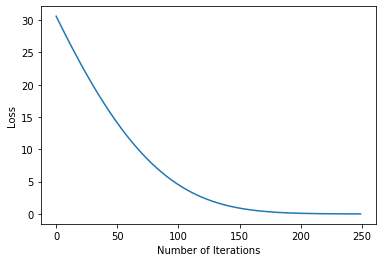

In [29]:
import plotFunction
plotFunction.function(lossValues)

# PART IV: Building CNN and Training

https://colab.research.google.com/drive/1MCXCnRyy2TOcZwABKQ83Vm_tzYVHrpIi

**Part IV - 10 pts**
* Provide link to your Google Colaboratory Notebook that implements the code for this part. Grader will run your code to verify your results. Without the link to you your Google Colaboratory Notebook you will not receive any points for Part IV! Your Notebook should include the code to plot the loss function value vs epoch curve during the training. 
* (5 pts) Show the loss function value vs epoch curve during the training of CNN built with Keras. The final accuracy should be higher than 85%.
    * NOTE: Accuracy below 85% will result in points deduction (80 ~ 85%: -1 point; below 80%: -2 points).
    * Report the final accuracy of your Keras model. Plot the loss function value vs epoch curve during the training.
* (5 pts) Show the loss function value vs epoch curve during the training of CNN built without Keras. The final accuracy should be higher than 85%.
    * NOTE: Accuracy below 85% will result in points deduction (80 ~ 85%: -1 point; below 80%: -2 points).
    * Report the final accuracy of your low-level API model. Plot the loss function value vs epoch curve during the training.

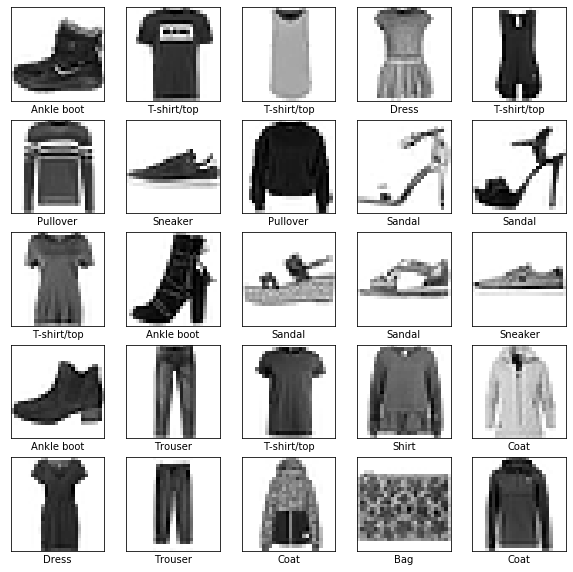

In [19]:
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow.compat.v1 import keras
import numpy as np
import h5py

# import data
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# label data
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# preprocess data
train_images = train_images / 255.0
test_images = test_images / 255.0

# visualize data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

**Keras**

In [89]:
# build CNN model
CNN_model = keras.Sequential([
    # convolution layer; 5x5 filter, stride = 1, no padding; ReLU; output = (3, 24, 24)
    keras.layers.Conv2D(filters=20, kernel_size=(5,5), strides=1, padding='valid', activation='relu', 
                        input_shape=(28, 28, 1)),
    
    # batch normalization
    keras.layers.BatchNormalization()
    
    # max pooling layer; strides = 2; output = (3, 12, 12)
    keras.layers.MaxPooling2D(strides=2),
    
    # convolution layer; 3x3 filter, stride = 1, with padding; ReLU; output = (3, 12, 12)
    keras.layers.Conv2D(filters=20, kernel_size=(3,3), strides=1, padding='same', activation='relu', 
                        input_shape=(12, 12, 3)),
    
    # max pooling layer; strides = 2; output = (3, 6, 6)
    keras.layers.MaxPooling2D(strides=2),
    
    # flatten 
    keras.layers.Flatten(),
    
    # fully connected layer; input size = 108, output size = 100; ReLU; output = (100, 1, 1)
    keras.layers.Dense(units=100, activation='relu'),
    
    # fully connected layer; input size = 100, output size = 75; ReLU; output = (75, 1, 1)
    keras.layers.Dense(units=75, activation='relu'),
    
    # fully connected layer; input size = 75, output size = 50; ReLU; output = (50, 1, 1)
    keras.layers.Dense(units=50, activation='relu'),
    
    # fully connected layer; input size = 50, output size = 25; ReLU; output = (25, 1, 1)
    keras.layers.Dense(units=25, activation='relu'),
    
    # fully connected layer; input size = 25, output size = 20; ReLU; output = (20, 1, 1)
    keras.layers.Dense(units=20, activation='relu'),
    
    # fully connected layer; input size = 20, output size = 15; ReLU; output = (15, 1, 1)
    keras.layers.Dense(units=15, activation='relu'),
    
    # fully connected layer; input size = 15, output size = 10; Softmax; output = (10, 1, 1)
    keras.layers.Dense(units=10, activation='softmax'),
])

# compile CNN model
CNN_model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

# train CNN model
trained_model = CNN_model.fit(train_images.reshape(60000, 28, 28, 1), train_labels, epochs=10)

# save the trained model
CNN_model.save('Keras_trained_model.h5')

# evaluate accuracy
test_loss, test_acc = CNN_model.evaluate(test_images.reshape(10000, 28, 28, 1), test_labels, verbose=2)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 27s 453us/sample - loss: 0.6463 - acc: 0.7500
Epoch 2/10
60000/60000 [==============================] - 26s 433us/sample - loss: 0.3922 - acc: 0.8555
Epoch 3/10
60000/60000 [==============================] - 25s 423us/sample - loss: 0.3220 - acc: 0.8819
Epoch 4/10
60000/60000 [==============================] - 26s 435us/sample - loss: 0.2835 - acc: 0.8952
Epoch 5/10
60000/60000 [==============================] - 28s 461us/sample - loss: 0.2593 - acc: 0.9038
Epoch 6/10
60000/60000 [==============================] - 27s 444us/sample - loss: 0.2390 - acc: 0.9107
Epoch 7/10
60000/60000 [==============================] - 26s 430us/sample - loss: 0.2230 - acc: 0.9183
Epoch 8/10
60000/60000 [==============================] - 28s 470us/sample - loss: 0.2078 - acc: 0.9235
Epoch 9/10
60000/60000 [==============================] - 25s 424us/sample - loss: 0.1967 - acc: 0.9269
Epoch 10/10
60000/60000 [================

In [90]:
print('\nTest accuracy:', test_acc)


Test accuracy: 0.9069


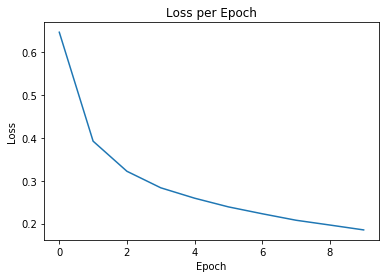

In [91]:
plt.plot(trained_model.history['loss'])
plt.title('Loss per Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [92]:
# recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('Keras_trained_model.h5')
# show the model architecture
new_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 12, 12, 20)        3620      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 20)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 720)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 100)               72100     
_________________________________________________________________
dense_33 (Dense)             (None, 75)               

**Low-Level API**

In [30]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
tf.reset_default_graph()

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [31]:
# Training Parameters
learning_rate = 0.001
batch_size = 128
num_steps = int(60000/batch_size)
display_step = 10

# Network Parameters
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
X = tf.placeholder(tf.float32, [None, num_input])
Y = tf.placeholder(tf.float32, [None, num_classes])
keep_prob = tf.placeholder(tf.float32) # dropout (keep probability)

In [32]:
# Create some wrappers for simplicity
def conv2d(x, W, b, strides=1, padding='SAME'):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding=padding)
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')

# Create model
def conv_net(x, weights, biases, dropout):
    # MNIST data input is a 1-D vector of 784 features (28*28 pixels)
    # Reshape to match picture format [Height x Width x Channel]
    # Tensor input become 4-D: [Batch Size, Height, Width, Channel]
    x = tf.reshape(x, shape=[-1, 28, 28, 1])

    # Convolution layer; 5x5 filter, stride = 1, no padding; ReLU; output = (3, 24, 24)
    conv1 = conv2d(x, weights['wc1'], biases['bc1'], padding='VALID')
    # Max pooling layer; strides = 2; output = (3, 12, 12)
    conv1 = maxpool2d(conv1, k=2)

    # Convolution layer; 3x3 filter, stride = 1, with padding; ReLU; output = (3, 12, 12)
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'], padding='SAME')
    # Max pooling layer; strides = 2; output = (3, 6, 6)
    conv2 = maxpool2d(conv2, k=2)
    
    # Flatten
    fl1 = tf.reshape(conv2, [-1,108]) 

    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    # Fully connected layer; input size = 108, output size = 100; ReLU; output = (100, 1, 1)
    fc1 = tf.add(tf.matmul(fl1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Fully connected layer; input size = 100, output size = 50; ReLU; output = (50, 1, 1)
    fc2 = tf.add(tf.matmul(fc1, weights['wd2']), biases['bd2'])
    fc2 = tf.nn.relu(fc2)
    # Fully connected layer; input size = 50, output size = 10; Softmax; output = (10, 1, 1)
    fc3 = tf.add(tf.matmul(fc2, weights['wd3']), biases['bd3'])
    
    return fc3

In [33]:
# Store layers weight & bias
weights = {
    # 3x1x5x5
    'wc1': tf.get_variable("W0", shape=[5, 5, 1, 3]),
    # 3x3x3x3
    'wc2': tf.get_variable("W1", shape=[3, 3, 3, 3]),
    # 108x100
    'wd1': tf.get_variable("W2", shape=[108, 100]),
    # 100x50
    'wd2': tf.get_variable("W3", shape=[100, 50]),
    # 50x10
    'wd3': tf.get_variable("W4", shape=[50, 10])
}

biases = {
    'bc1': tf.get_variable("B0", shape=[3], initializer=tf.zeros_initializer()),
    'bc2': tf.get_variable("B1", shape=[3], initializer=tf.zeros_initializer()),
    'bd1': tf.get_variable("B2", shape=[100], initializer=tf.zeros_initializer()),
    'bd2': tf.get_variable("B3", shape=[50], initializer=tf.zeros_initializer()),
    'bd3': tf.get_variable("B4", shape=[10], initializer=tf.zeros_initializer())
}

# Construct model
logits = conv_net(X, weights, biases, keep_prob)
prediction = tf.nn.softmax(logits)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [46]:
loss_val = []

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    for step in range(1, num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, keep_prob: 1.0})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                 Y: batch_y,
                                                                 keep_prob: 1.0})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))
            
            loss_val.append(loss)

    print("Optimization Finished!")

    # Calculate accuracy for 256 MNIST test images
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: mnist.test.images[:256],
                                      Y: mnist.test.labels[:256],
                                      keep_prob: 1.0}))

Step 1, Minibatch Loss= 2.2923, Training Accuracy= 0.109
Step 10, Minibatch Loss= 2.2230, Training Accuracy= 0.297
Step 20, Minibatch Loss= 1.9929, Training Accuracy= 0.391
Step 30, Minibatch Loss= 1.6280, Training Accuracy= 0.492
Step 40, Minibatch Loss= 1.3536, Training Accuracy= 0.641
Step 50, Minibatch Loss= 1.1571, Training Accuracy= 0.648
Step 60, Minibatch Loss= 0.7868, Training Accuracy= 0.766
Step 70, Minibatch Loss= 0.7359, Training Accuracy= 0.742
Step 80, Minibatch Loss= 0.6559, Training Accuracy= 0.836
Step 90, Minibatch Loss= 0.5019, Training Accuracy= 0.820
Step 100, Minibatch Loss= 0.5753, Training Accuracy= 0.836
Step 110, Minibatch Loss= 0.4496, Training Accuracy= 0.883
Step 120, Minibatch Loss= 0.4831, Training Accuracy= 0.883
Step 130, Minibatch Loss= 0.3720, Training Accuracy= 0.898
Step 140, Minibatch Loss= 0.4052, Training Accuracy= 0.883
Step 150, Minibatch Loss= 0.5206, Training Accuracy= 0.828
Step 160, Minibatch Loss= 0.3269, Training Accuracy= 0.930
Step 170

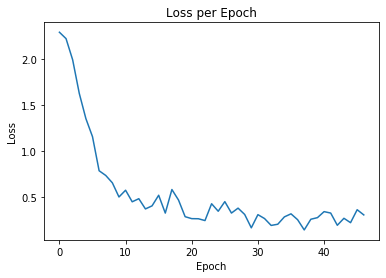

In [47]:
plt.plot(loss_val)
plt.title('Loss per Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# PART V: Deployment and Inference

**Part V - 12 pts**
* Provide link to your  Google Colaboratory Notebook that implements the code for this part of the lab. Grader will run your code to verify your results. Without the link to you your Google Colaboratory Notebook you will not  receive any points for Part V!  Your code must include the following components:
* (2 pts) Request and get test datasets from the remote server correctly.
* (4 pts) Run inference on the test dataset and generate prediction results.
* (2 pts) Send your prediction results in POST request to the remote server.
* (3 pts) Get the number of correct predictions from the remote server. The prediction accuracy should be higher than 85%.
* (1 pt) Have code to request 5 test datasets from server and report the inference accuracies on these test datasets.
    * NOTE: Accuracy below 85% will result in points deduction (80 ~ 85%: -1 point; below 80%: -2 points).

In [93]:
import requests
import gzip
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow.compat.v1 import keras
import numpy as np
import h5py

def get_testset():
    url = 'https://courses.engr.illinois.edu/ece498icc/sp2020/lab1_request_dataset.php'
    values = {'request': 'testdata', 'netid':'yucheng9'}
    r = requests.post(url, data=values, allow_redirects=True)
    filename = r.url.split("/")[-1]
    testset_id = filename.split(".")[0].split("_")[-1]
    with open(filename, 'wb') as f:
        f.write(r.content)
    return load_dataset(filename), testset_id

def load_dataset(path):
    num_img = 1000
    with gzip.open(path, 'rb') as infile:
        data = np.frombuffer(infile.read(), dtype=np.uint8).reshape(num_img, 784)
    return data

def verify_accuracy(testset_id, prediction):
    url = 'https://courses.engr.illinois.edu/ece498icc/sp2020/lab1_request_dataset.php'
    values = {'request': 'verify', 'netid':'yucheng9',
              'testset_id':testset_id, 'prediction':prediction}
    r = requests.post(url, data=values, allow_redirects=True)

    return r.json()/1000.0

model = tf.keras.models.load_model('Keras_trained_model.h5')

for i in range(5):
    images,id = get_testset()
    predictions = ''
    for j in range(1000):
        test_image = images[j].reshape(1,28,28,1)
        prediction = model.predict_classes(test_image)
        predictions= predictions+str(prediction[0])

    print("Dataset ID:", id)
    print("The number of correct predictions:", 1000*verify_accuracy(id,predictions))
    print("Accuracy:", verify_accuracy(id,predictions))

Dataset ID: 9ed727df
The number of correct predictions: 873.0
Accuracy: 0.873
Dataset ID: 84ec9825
The number of correct predictions: 891.0
Accuracy: 0.891
Dataset ID: 32e4962e
The number of correct predictions: 861.0
Accuracy: 0.861
Dataset ID: 11d6c3d6
The number of correct predictions: 904.0
Accuracy: 0.904
Dataset ID: 4d6c5164
The number of correct predictions: 889.0
Accuracy: 0.889


# Conclusion

* If you made any assumptions about the functionality of the system, please list and justify them
    * My tensorflow version is 2.0.0, I used tf.disable_v2_behavior() to run tf 1.x.x version.
    * In Part III, my sys.argv is ['/Users/yuchengjin/anaconda3/lib/python3.7/site packages/ipykernel_launcher.py', '-f', '/Users/yuchengjin/Library/Jupyter/runtime/kernel-b0d84050-0454-4670-bf1d-ec676d110f35.json'], with len(sys.argv) > 1, so I modified code a little bit to enable random seed.

* The difficulties/bugs you encountered and how you solved them
    * The most important difficulty is to improve the performance of my Keras CNN. The accuracy of my Keras CNN was pretty low with the original configuration, therefore, I added some dense layers, and increased the number of filters to solve this problem.

* What you learned from this lab
    * How to make HTTP request and receive information online.
    * Numpy and Tensorflow basics.
    * How to build up Keras and low-level CNN, and adjust parameters to improve their performance.  